In [25]:
!pip install seaborn

     |████████████████████████████████| 292 kB 854 kB/s            
You should consider upgrading via the '/home/phillip/miniconda3/envs/timeeval/bin/python3.8 -m pip install --upgrade pip' command.


In [26]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.set(rc={"figure.figsize":(20, 10)})

In [3]:
with open("../results.only.patternlength.json", "r") as f:
    scores = json.load(f)

In [4]:
with open("../transitions.only.patternlength.json", "r") as f:
    transi = json.load(f)

<AxesSubplot:ylabel='Count'>

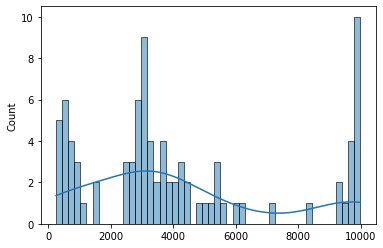

In [36]:
keys = scores["mut:5000/akita/s2gpp"].keys()

x = []
y = []

for k in keys:
    s = scores["mut:5000/akita/s2gpp"][k]["score"]
    if s is not None and float(s) > 0.99:
        x.append(s)
        y.append(int(transi["mut:5000/akita/s2gpp"][k]["transitions"][0]))

sns.histplot(y, bins=50, kde=True)

In [66]:
import pandas as pd
import numpy as np
from pathlib import Path

In [117]:
df = pd.read_csv("../data/hyperopt/datasets.csv")

In [130]:
def first_int_or_none(x: list):
    if len(x) == 0:
        return np.NAN
    return int(x[0])

def first_float_or_none(x: list):
    if len(x) == 0:
        return np.NAN
    return float(x[0])

In [131]:
base_path = Path(list(scores["mut:5000/akita/s2gpp"].keys())[0]).parent.parent
df.loc[:, "score"] = df.dataset_name.apply(lambda d: scores["mut:5000/akita/s2gpp"][str(base_path / d.split(".")[0] / "test.csv")]["score"]).astype(float)
df.loc[:, "pattern-length"] = df.dataset_name.apply(lambda d: first_float_or_none(scores["mut:5000/akita/s2gpp"][str(base_path / d.split(".")[0] / "test.csv")]["location"])).astype(float)
df.loc[:, "transitions"] = df.dataset_name.apply(lambda d: first_int_or_none(transi["mut:5000/akita/s2gpp"][str(base_path / d.split(".")[0] / "test.csv")]["transitions"]))
df.loc[:, "bo"] = df.dataset_name.apply(lambda x: x.split("-")[0])
df.loc[:, "atype"] = df.dataset_name.apply(lambda x: x.split("-")[1])

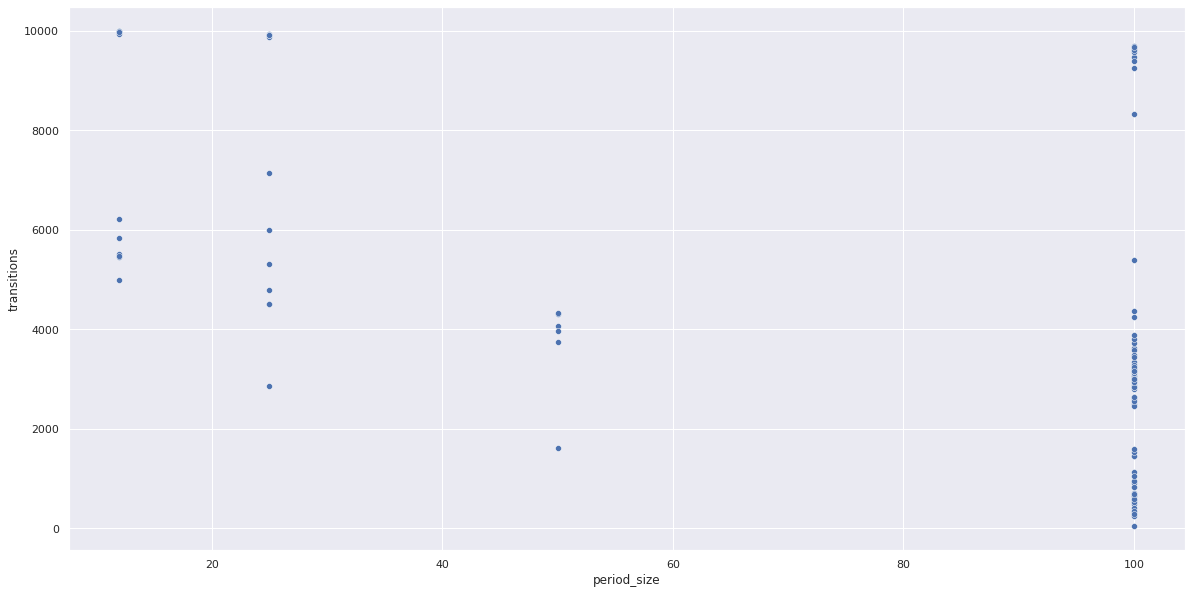

In [143]:
g = sns.scatterplot(y=df.transitions, x=df["period_size"])

<AxesSubplot:>

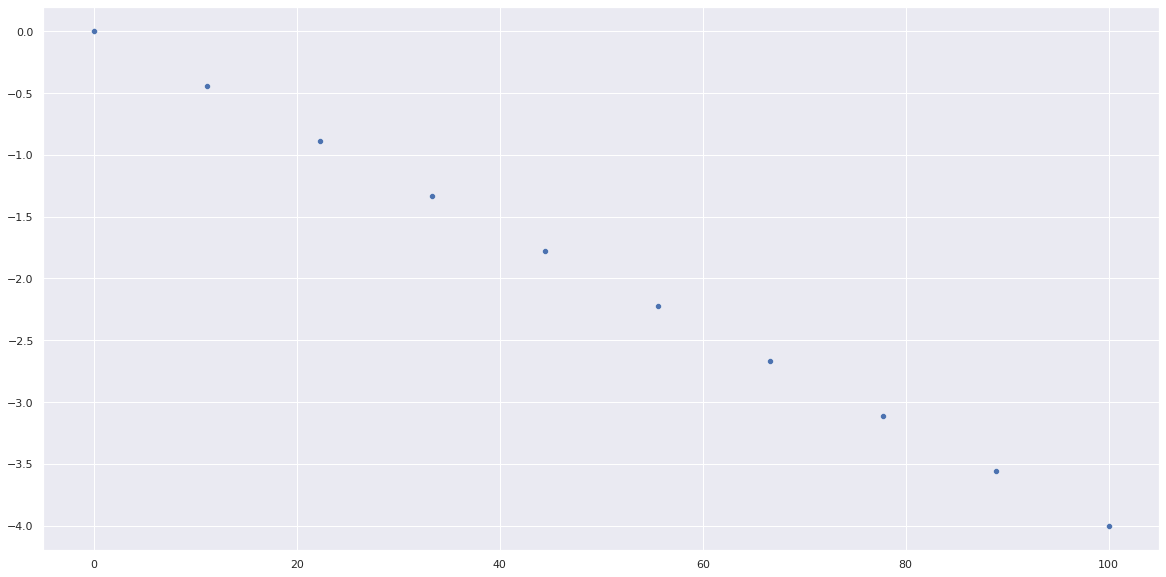

In [145]:
x = np.linspace(0, 100, 10)
sns.scatterplot(x=x, y=x * (-20/500))